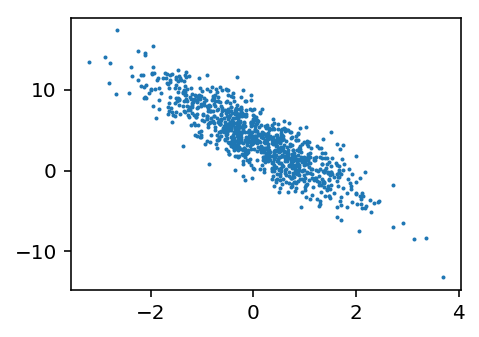


[[-0.02341726 -1.2996607 ]
 [-1.4110408   1.002317  ]
 [-1.0984623  -1.0842608 ]
 [ 0.32475844  0.8709034 ]
 [ 1.1800139   0.25812253]
 [ 1.1172453   0.0924398 ]
 [ 0.2646684  -1.4747816 ]
 [-0.1528175   0.6748408 ]
 [ 1.7516011   0.13607101]
 [ 0.02744487 -1.3117542 ]]
<NDArray 10x2 @cpu(0)> 
[ 8.584745  -2.016802   5.6867647  1.8769618  5.678473   6.1052623
  9.732335   1.6087266  7.234599   8.7134285]
<NDArray 10 @cpu(0)>
epoch 1, loss 0.054754
epoch 2, loss 0.000242
epoch 3, loss 0.000049


(4.2, 
 [4.199024]
 <NDArray 1 @cpu(0)>)

In [2]:
from IPython.display import set_matplotlib_formats
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random
#生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)
features[0], labels[0]

def set_figsize(figsize=(3.5, 2.5)):
    set_matplotlib_formats('retina')  # 打印高清图。
    plt.rcParams['figure.figsize'] = figsize  # 设置图的尺寸。

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)
plt.show()
#读取数据集
batch_size = 10
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 样本的读取顺序是随机的。
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        # take 函数根据索引返回对应元素。
        yield features.take(j), labels.take(j)
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break  
#初始化模型参数
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))
params = [w, b]
for param in params:
    param.attach_grad()
#定义模型
def linreg(X, w, b): 
    return nd.dot(X, w) + b 
#定义损失函数
def squared_loss(y_hat, y): 
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
#定义优化算法
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size
#训练模型
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

# 训练模型一共需要 num_epochs 个迭代周期。
for epoch in range(1, num_epochs + 1):
    # 在一个迭代周期中，使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。
    # X 和 y 分别是小批量样本的特征和标签。
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            # l 是有关小批量 X 和 y 的损失。
            l = loss(net(X, w, b), y)
        # 小批量的损失对模型参数求导。
        l.backward()
        # 使用小批量随机梯度下降迭代模型参数。
        sgd([w, b], lr, batch_size)
    print('epoch %d, loss %f'
          % (epoch, loss(net(features, w, b), labels).mean().asnumpy()))
#打印出训练参数与真实参数
true_w, w
true_b, b
        